In [4]:
import json
import rich
import pandas as pd

In [5]:
# with open("llama_3b_persona_inferene_1000_token_5_epoch_subtestset.json", "r") as f:
#     llama_inference = json.load(f)

# with open("alpaca_big_five_dataset_1000_test_5_tokens_subtestset.json", "r") as f:
#     ground_true = json.load(f)

# data = []
# for i in llama_inference:
#     data.append(i['input'] + " " + i['prediction'])

# df = pd.DataFrame(data, columns=["message"])

# df.to_csv("alpaca_test_5_token_subtest_evaluate_998.csv")

In [6]:
data = pd.read_csv("alpaca_test_5_tokens_subtest_998.csv")
with open("alpaca_big_five_dataset_classifier.json", 'r') as f:
    pred = json.load(f)

In [7]:
pred

{'preds': [[2,
   0,
   2,
   2,
   1,
   2,
   1,
   1,
   1,
   0,
   1,
   0,
   1,
   2,
   2,
   0,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   2,
   2,
   0,
   1,
   1,
   1,
   1,
   2,
   1,
   2,
   0,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   0,
   0,
   2,
   2,
   2,
   1,
   2,
   1,
   1,
   2,
   2,
   2,
   0,
   0,
   0,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   0,
   2,
   2,
   0,
   0,
   2,
   0,
   1,
   0,
   1,
   2,
   1,
   1,
   0,
   0,
   0,
   2,
   0,
   2,
   1,
   2,
   0,
   0,
   0,
   1,
   1,
   2,
   2,
   0,
   2,
   2,
   2,
   0,
   0,
   1,
   2,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   1,
   2,
   1,
   2,
   2,
   1,
   2,
   0,
   0,
   2,
   0,
   2,
   1,
   1,
   0,
   2,
   1,
   0,
   0,
   1,
   0,
   2,
   1,
   0,
   2,
   1,
   2,
   0,
   0,
   0,
   1,
   1,
   0,
   2,
   2,
   1,
   2,
   1,
   2,
   0,
   2,
   1,
   2,
   0,
   1,
   1,
   0,
   0,
   0,
   2,
   0,
   0,
   1,
   2,
   1,
   2,
   0,
 

In [8]:
data.head(2)

,Unnamed: 0.1,Unnamed: 0,message,ope_z_label,con_z_label,ext_z_label,agr_z_label,neu_z_label
0,0,11384,there is a midget in a wheelchair parked in th...,0,2,1,0,2
1,1,54946,this snow is prohibiting my departure from chi...,0,2,2,2,0


In [9]:
ope_g = data['ope_z_label'].to_list()
con_g = data['con_z_label'].to_list()
ext_g = data['ext_z_label'].to_list()
agr_g = data['agr_z_label'].to_list()
neu_g = data['neu_z_label'].to_list()

In [10]:
ope_p = pred['preds'][0]
con_p = pred['preds'][1]
ext_p = pred['preds'][2]
agr_p = pred['preds'][3]
neu_p = pred['preds'][4]

In [11]:
from evaluate import load
import numpy as np

def calculate_metrics(y_true, y_pred, average='macro'):
    accuracy_metric = load("accuracy")
    f1_metric = load("f1")
    precision_metric = load("precision")
    recall_metric = load("recall")

    accuracy = accuracy_metric.compute(references=y_true, predictions=y_pred)["accuracy"]
    f1 = f1_metric.compute(references=y_true, predictions=y_pred, average=average)["f1"]
    precision = precision_metric.compute(references=y_true, predictions=y_pred, average=average)["precision"]
    recall = recall_metric.compute(references=y_true, predictions=y_pred, average=average)["recall"]

    return accuracy, f1, precision, recall

/home/wenkail/miniconda3/envs/lp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
accuracies = []
f1s = []
precisions = []
recalls = []
accuracy, f1, precision, recall = calculate_metrics(ope_g, ope_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(con_g, con_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(ext_g, ext_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(agr_g, agr_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(neu_g, neu_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)


In [13]:
accuracies

[0.503006012024048,
 0.501002004008016,
 0.4909819639278557,
 0.4969939879759519,
 0.5170340681362725]

/tmp/ipykernel_2985311/3548185258.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 5))


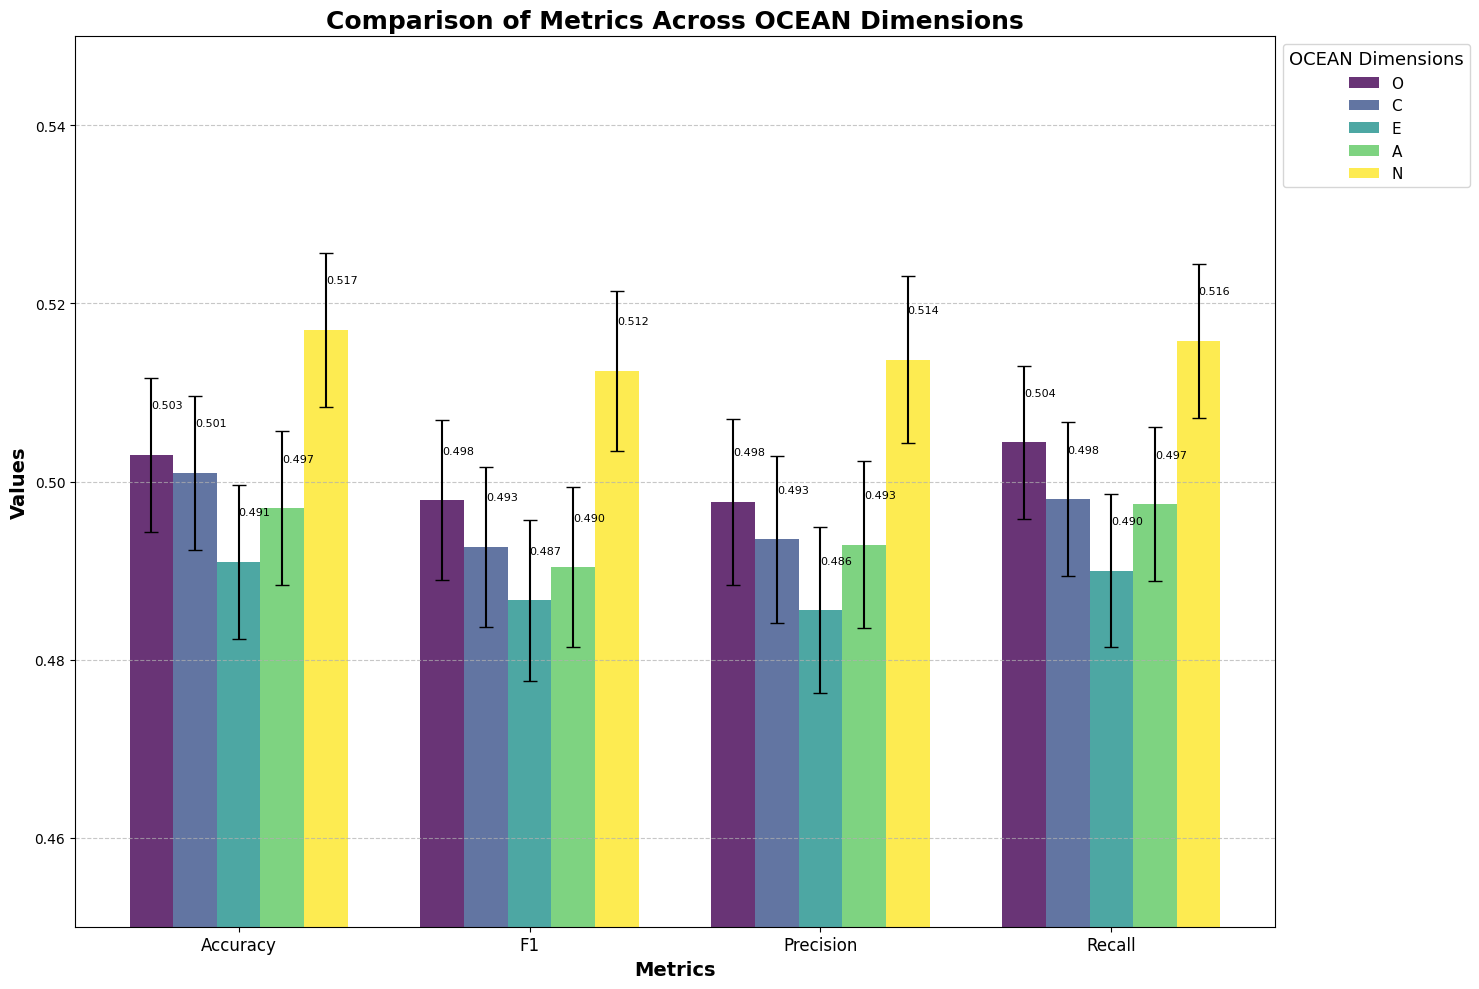

In [23]:
import matplotlib.pyplot as plt
import numpy as np


# 将所有数据组合到一个列表中
data = [accuracies, f1s, precisions, recalls]

# 定义metrics和维度
metrics = ['Accuracy', 'F1', 'Precision', 'Recall']
dimensions = ['O', 'C', 'E', 'A', 'N']

errors = [np.std(metric) for metric in data]
# Set up the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Set bar width and positions
bar_width = 0.15
r = np.arange(len(metrics))

# Set colors
colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 5))

# Plot bars with error bars
for i in range(len(dimensions)):
    ax.bar(r + i*bar_width, [d[i] for d in data], width=bar_width, label=dimensions[i], color=colors[i], alpha=0.8)
    ax.errorbar(r + i*bar_width, [d[i] for d in data], yerr=errors, fmt='none', ecolor='black', capsize=5)

# Customize the plot
ax.set_xlabel('Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Values', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Metrics Across OCEAN Dimensions', fontsize=18, fontweight='bold')
ax.set_xticks(r + bar_width*2)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(title='OCEAN Dimensions', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Set y-axis range
ax.set_ylim(0.45, 0.55)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i in range(len(metrics)):
    for j in range(len(dimensions)):
        ax.text(r[i] + j*bar_width, data[i][j] + 0.005, f'{data[i][j]:.3f}', 
                ha='left', va='bottom', fontsize=8, rotation=0)

# Add a text box with additional information
# info_text = "Note:\n• Error bars represent standard deviation\n• OCEAN: Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism\n• Values are simulated based on provided accuracy data"
ax.text(1.05, 0.05, None, transform=ax.transAxes, fontsize=10, verticalalignment='bottom', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Make room for the legend

# Show plot
plt.show()

In [25]:
print("Average Sentence Similarity: 0.9380")
print("Average Token Overlapping Ratio: 0.9223")
print("Average JSD Sentence Similarity: 0.9542")

Average Sentence Similarity: 0.9380
Average Token Overlapping Ratio: 0.9223
Average JSD Sentence Similarity: 0.9542
